In [1]:
import pandas as pd
import sklearn
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
data = pd.read_excel('../data/sample data SR99.xlsx')
keys = data.keys()

In [5]:
# create the word set for encoding purpose 
bag_words = []
for k in keys:
    clean_k = clean_key(k)
    bag_words+=clean_k

In [6]:
words_dict = list(set(bag_words))

In [8]:
encoding_list = []
for k in keys:
    clean_k = clean_key(k)
    encoding = sentence_encoding(clean_k)
    encoding_list.append(encoding)

Drill duplicate
Drill duplicate
Cab duplicate
Cab duplicate
Cutter duplicate
Cutter duplicate
Cutter duplicate
Left duplicate
Left duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
SCREW duplicate
SCREW duplicate
Water duplicate
Foam duplicate
Water duplicate
Foam duplicate
Valve duplicate
Foam duplicate
Foam duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
Valve duplicate
seal duplicate
seal duplicate
seal duplicate
seal duplicate
VALVE duplicate
VALVE duplicate
VALVE duplicate
VALVE duplicate
Belt duplicate
Belt duplicate
seal duplicate
seal duplicate
seal duplicate
seal duplicate
seal duplicate
seal dupli

In [9]:
len(encoding_list)

5975

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
db = DBSCAN(eps=1e-2, min_samples=2,metric="cosine").fit(encoding_list)

In [12]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)



Estimated number of clusters: 702
Estimated number of noise points: 939


In [13]:
# get attribute of clusters
cluster_item_count = []
for i in range(n_clusters_):
    cluster = np.array(keys)[labels==i]
    num_items = len(cluster)
    cluster_item_count.append(num_items)

In [14]:
num_thre = 20
large_cluster_ids = [i for (i,n) in enumerate(cluster_item_count) if n>num_thre]
print (len(large_cluster_ids))
print (np.array(keys)[labels==large_cluster_ids[np.random.randint(len(large_cluster_ids))]])

71
['[1896] F1 FOAM LINE HIGH PRESSURE ALARM'
 '[1897] F2 FOAM LINE HIGH PRESSURE ALARM'
 '[1898] F3 FOAM LINE HIGH PRESSURE ALARM'
 '[1899] F4 FOAM LINE HIGH PRESSURE ALARM'
 '[1900] F5 FOAM LINE HIGH PRESSURE ALARM'
 '[1901] F6 FOAM LINE HIGH PRESSURE ALARM'
 '[1902] F7 FOAM LINE HIGH PRESSURE ALARM'
 '[1903] F8 FOAM LINE HIGH PRESSURE ALARM'
 '[1904] F9 FOAM LINE HIGH PRESSURE ALARM'
 '[1905] F10 FOAM LINE HIGH PRESSURE ALARM'
 '[1906] F11 FOAM LINE HIGH PRESSURE ALARM'
 '[1907] F12 FOAM LINE HIGH PRESSURE ALARM'
 '[1908] F13 FOAM LINE HIGH PRESSURE ALARM'
 '[1909] F14 FOAM LINE HIGH PRESSURE ALARM'
 '[1910] F15 FOAM LINE HIGH PRESSURE ALARM'
 '[1911] F16 FOAM LINE HIGH PRESSURE ALARM'
 '[1912] F17 FOAM LINE HIGH PRESSURE ALARM'
 '[1913] F18 FOAM LINE HIGH PRESSURE ALARM'
 '[1914] F19 FOAM LINE HIGH PRESSURE ALARM'
 '[1915] F21 FOAM LINE HIGH PRESSURE ALARM'
 '[5290] F23 FOAM LINE HIGH PRESSURE ALARM'
 '[5291] F24 FOAM LINE HIGH PRESSURE ALARM'
 '[5292] F25 FOAM LINE HIGH PRESSURE A

## Find relations inside categories

In [68]:
# try a specific case first
sample_group_id = large_cluster_ids[13]
sample_keys_l = np.array(keys)[labels == sample_group_id]
# print (len(sample_keys_l),sample_keys_l)
# select data from data set for these keys
sample_group_data = data[sample_keys_l]
# remove the first row, unit
sample_group_data = sample_group_data.drop([0])
print (sample_group_data.isna().sum())
# fill nan by column mean
sample_group_data = sample_group_data.fillna(sample_group_data.mean())
series_list = sample_group_data.values.transpose()

[904] No.1 Shield Jack Selected     0
[905] No.2 Shield Jack Selected     0
[906] No.3 Shield Jack Selected     0
[907] No.4 Shield Jack Selected     0
[908] No.5 Shield Jack Selected     0
[909] No.6 Shield Jack Selected     0
[910] No.7 Shield Jack Selected     0
[911] No.8 Shield Jack Selected     0
[912] No.9 Shield Jack Selected     0
[913] No.10 Shield Jack Selected    0
[914] No.11 Shield Jack Selected    0
[915] No.12 Shield Jack Selected    0
[916] No.13 Shield Jack Selected    0
[917] No.14 Shield Jack Selected    0
[918] No.15 Shield Jack Selected    0
[919] No.16 Shield Jack Selected    0
[920] No.17 Shield Jack Selected    0
[921] No.18 Shield Jack Selected    0
[922] No.19 Shield Jack Selected    0
[923] No.20 Shield Jack Selected    0
[924] No.21 Shield Jack Selected    0
[925] No.22 Shield Jack Selected    0
[926] No.23 Shield Jack Selected    0
[927] No.24 Shield Jack Selected    0
[928] No.25 Shield Jack Selected    0
[929] No.26 Shield Jack Selected    0
[930] No.27 

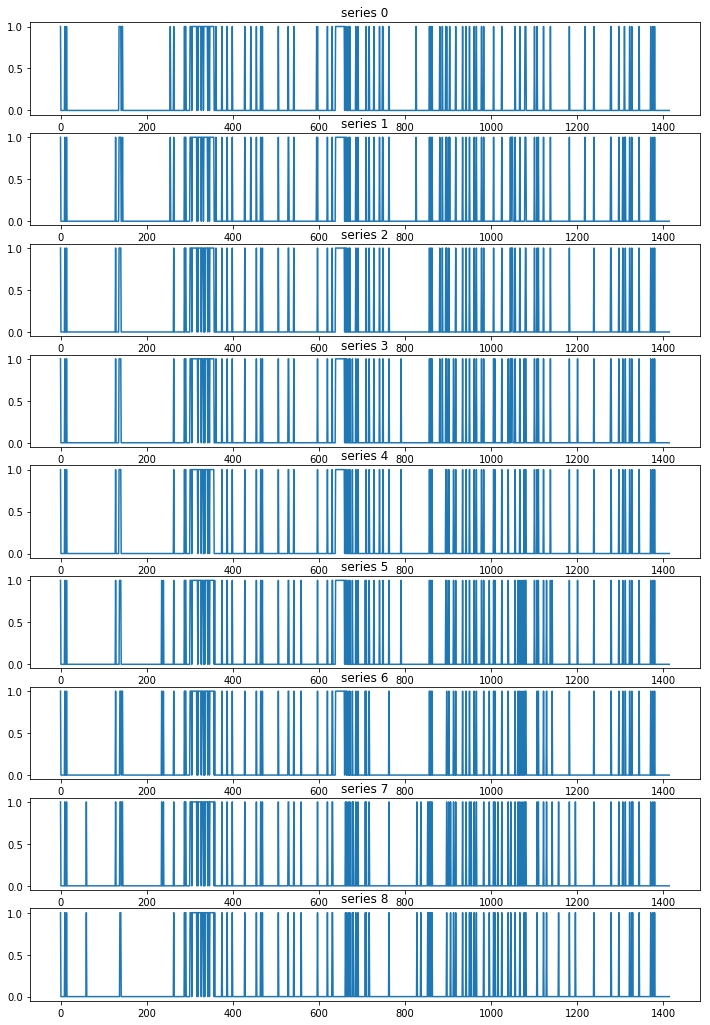

In [69]:
plot_multi_series(series_list)

In [70]:
corr_mat = compute_corr_matrix(series_list)
uncor_pair = find_uncorr_pair(corr_mat,thre=0.7)
print (len(uncor_pair),uncor_pair)

491 [(5, 31), (3, 35), (27, 46), (33, 55), (6, 28), (7, 25), (16, 47), (14, 31), (15, 30), (11, 22), (0, 17), (12, 17), (1, 28), (2, 27), (14, 43), (25, 49), (5, 24), (3, 40), (1, 40), (23, 53), (6, 23), (4, 35), (7, 22), (5, 34), (9, 39), (6, 41), (10, 36), (31, 51), (11, 41), (13, 51), (1, 21), (14, 50), (15, 43), (3, 17), (1, 33), (4, 42), (7, 15), (5, 43), (16, 29), (6, 32), (5, 53), (16, 51), (12, 41), (8, 25), (10, 19), (11, 26), (14, 53), (12, 29), (15, 48), (3, 22), (27, 53), (21, 55), (4, 17), (2, 33), (5, 20), (29, 55), (27, 43), (6, 27), (11, 39), (12, 32), (17, 43), (13, 37), (9, 29), (14, 26), (10, 26), (11, 19), (0, 28), (1, 25), (13, 25), (2, 30), (3, 31), (15, 39), (4, 24), (0, 40), (5, 29), (3, 37), (33, 53), (7, 27), (5, 39), (16, 33), (14, 29), (12, 53), (15, 24), (0, 19), (12, 19), (1, 18), (2, 25), (0, 9), (14, 41), (25, 55), (15, 44), (3, 42), (23, 55), (6, 21), (7, 16), (5, 32), (16, 24), (23, 45), (10, 34), (8, 14), (11, 43), (9, 15), (13, 49), (9, 17), (10, 22)

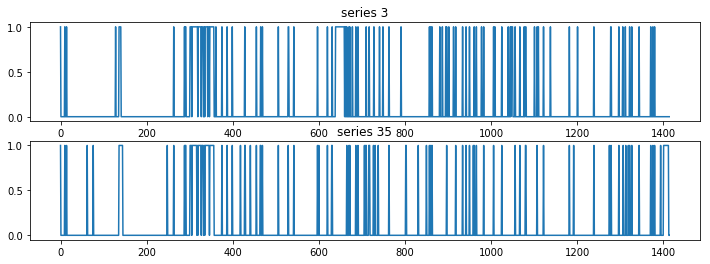

In [71]:
plot_multi_series(series_list,uncor_pair[1])

In [53]:
db = DBSCAN(eps=0.3, min_samples=2,metric=corr_dist_lag0,n_jobs=-1).fit(series_list)

In [54]:
labels_g = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_g)) - (1 if -1 in labels else 0)
n_noise_ = list(labels_g).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 8


In [55]:
labels

array([ 0,  0, -1, ..., -1, -1, -1])